In [71]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt 
import calendar
from matplotlib.ticker import MaxNLocator

data = pd.read_csv("retail_sale.csv")
print(data.head(10))

   transactions_id   sale_date sale_time  customer_id  gender   age  \
0              180  2022-11-05  10:47:00          117    Male  41.0   
1              522  2022-07-09  11:00:00           52    Male  46.0   
2              559  2022-12-12  10:48:00            5  Female  40.0   
3             1180  2022-01-06  08:53:00           85    Male  41.0   
4             1522  2022-11-14  08:35:00           48    Male  46.0   
5             1559  2022-08-20  07:40:00           49  Female  40.0   
6              163  2022-10-31  09:38:00          144  Female  64.0   
7              303  2022-04-22  11:09:00           54    Male  19.0   
8              421  2022-04-08  08:43:00           66  Female  37.0   
9              979  2022-05-18  10:18:00            6  Female  19.0   

      category  quantiy  price_per_unit   cogs  total_sale  
0     Clothing      3.0           300.0  129.0       900.0  
1       Beauty      3.0           500.0  145.0      1500.0  
2     Clothing      4.0           3

In [4]:
# Drop missing datas:

data = data.dropna()
print(data.isna().sum())

transactions_id    0
sale_date          0
sale_time          0
customer_id        0
gender             0
age                0
category           0
quantiy            0
price_per_unit     0
cogs               0
total_sale         0
dtype: int64


In [57]:
# Convert sale_date to datetime type
data['sale_date'] = pd.to_datetime(data['sale_date'])

data["month"] = data["sale_date"].dt.month_name()
data['year'] = data['sale_date'].dt.year

print(data.head(10))

   transactions_id  sale_date sale_time  customer_id  gender   age  \
0              180 2022-11-05  10:47:00          117    Male  41.0   
1              522 2022-07-09  11:00:00           52    Male  46.0   
2              559 2022-12-12  10:48:00            5  Female  40.0   
3             1180 2022-01-06  08:53:00           85    Male  41.0   
4             1522 2022-11-14  08:35:00           48    Male  46.0   
5             1559 2022-08-20  07:40:00           49  Female  40.0   
6              163 2022-10-31  09:38:00          144  Female  64.0   
7              303 2022-04-22  11:09:00           54    Male  19.0   
8              421 2022-04-08  08:43:00           66  Female  37.0   
9              979 2022-05-18  10:18:00            6  Female  19.0   

      category  quantiy  price_per_unit   cogs  total_sale     month  year  
0     Clothing      3.0           300.0  129.0       900.0  November  2022  
1       Beauty      3.0           500.0  145.0      1500.0      July  2022 

In [43]:
# Number of colums and rows (number_of_rows, number_of_columns)

x, y = data.shape
print("number of rows:", x)
print("number of columns:", y)

number of rows: 1987
number of columns: 13


In [44]:
# Quick info about data

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 37 to 1307
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transactions_id  1987 non-null   int64         
 1   sale_date        1987 non-null   datetime64[ns]
 2   sale_time        1987 non-null   object        
 3   customer_id      1987 non-null   int64         
 4   gender           1987 non-null   object        
 5   age              1987 non-null   float64       
 6   category         1987 non-null   object        
 7   quantiy          1987 non-null   float64       
 8   price_per_unit   1987 non-null   float64       
 9   cogs             1987 non-null   float64       
 10  total_sale       1987 non-null   float64       
 11  month            1987 non-null   object        
 12  year             1987 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(4)
memory usage: 209.6+ KB
None


In [45]:
# Total sale according to category (sum, min, max, avg):
print("Total sale:")
print(data.groupby("category")["total_sale"].sum())

print("\nAverage sale:")
print(data.groupby("category")["total_sale"].mean())

print("\nMAX sale:")
print(data.groupby("category")["total_sale"].max())

print("\nMIN sale:")
print(data.groupby("category")["total_sale"].min())

#Short type:
result = data.groupby("category")["total_sale"].agg(['sum', 'mean', 'max', 'min'])
print(result)

Total sale:
category
Beauty         286790.0
Clothing       309995.0
Electronics    311445.0
Name: total_sale, dtype: float64

Average sale:
category
Beauty         469.378069
Clothing       444.118911
Electronics    459.358407
Name: total_sale, dtype: float64

MAX sale:
category
Beauty         2000.0
Clothing       2000.0
Electronics    2000.0
Name: total_sale, dtype: float64

MIN sale:
category
Beauty         25.0
Clothing       25.0
Electronics    25.0
Name: total_sale, dtype: float64
                  sum        mean     max   min
category                                       
Beauty       286790.0  469.378069  2000.0  25.0
Clothing     309995.0  444.118911  2000.0  25.0
Electronics  311445.0  459.358407  2000.0  25.0


In [46]:
# Product sale category according to age

print(data.groupby('category')["age"].mean())

category
Beauty         40.415712
Clothing       41.929799
Electronics    41.598820
Name: age, dtype: float64


In [47]:
# Average age according to gender

print(data.groupby("gender")["age"].agg(["min", "max", "mean"]))

         min   max       mean
gender                       
Female  18.0  64.0  41.287549
Male    18.0  64.0  41.417436


In [48]:
# Sale quantity according to category by Year:
sale_quantity = data.groupby(["category", "year"])["quantiy"].sum().reset_index()
print(sale_quantity)

      category  year  quantiy
0       Beauty  2022    774.0
1       Beauty  2023    759.0
2     Clothing  2022    843.0
3     Clothing  2023    937.0
4  Electronics  2022    824.0
5  Electronics  2023    858.0


year          2022   2023
category                 
Beauty       774.0  759.0
Clothing     843.0  937.0
Electronics  824.0  858.0


<Figure size 1200x800 with 0 Axes>

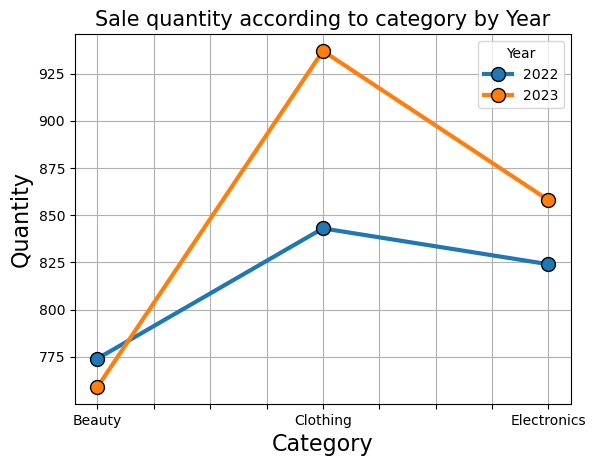

In [74]:

# Bigger figure
plt.figure(figsize=(12, 8))

quantity_pivot= sale_quantity.pivot(index= "category", columns= "year", values ="quantiy")
print(quantity_pivot)
quantity_pivot.plot (
    marker="o",
    markersize=10,
    markeredgecolor="black",
    linestyle="-",  
    linewidth=3
)
plt.title('Sale quantity according to category by Year', fontsize=15)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Quantity', fontsize=16)
plt.legend(title='Year')
plt.grid(True)
plt.show()



In [59]:
# total sale according to years and months

yearly_sale = data.groupby(["year","month"])["total_sale"].sum().reset_index()

# Define proper month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'month' column to a categorical type with this order
yearly_sale['month'] = pd.Categorical(
    yearly_sale['month'],
    categories=month_order,
    ordered=True
)

# Sort and pivot
yearly_sale = yearly_sale.sort_values(['year', 'month'])


print(yearly_sale)

    year      month  total_sale
4   2022    January     22635.0
3   2022   February     16110.0
7   2022      March     24505.0
0   2022      April     28705.0
8   2022        May     24980.0
6   2022       June     20700.0
5   2022       July     22195.0
1   2022     August     21195.0
11  2022  September     61770.0
10  2022    October     68235.0
9   2022   November     68915.0
2   2022   December     72880.0
16  2023    January     23790.0
15  2023   February     25170.0
19  2023      March     20530.0
12  2023      April     21925.0
20  2023        May     27010.0
18  2023       June     24555.0
17  2023       July     35925.0
13  2023     August     28270.0
23  2023  September     67560.0
22  2023    October     57880.0
21  2023   November     57135.0
14  2023   December     69145.0


In [60]:
# Create a pivot table for easier plotting
pivot = yearly_sale.pivot(index='month', columns='year', values='total_sale')
print(pivot)


year          2022     2023
month                      
January    22635.0  23790.0
February   16110.0  25170.0
March      24505.0  20530.0
April      28705.0  21925.0
May        24980.0  27010.0
June       20700.0  24555.0
July       22195.0  35925.0
August     21195.0  28270.0
September  61770.0  67560.0
October    68235.0  57880.0
November   68915.0  57135.0
December   72880.0  69145.0


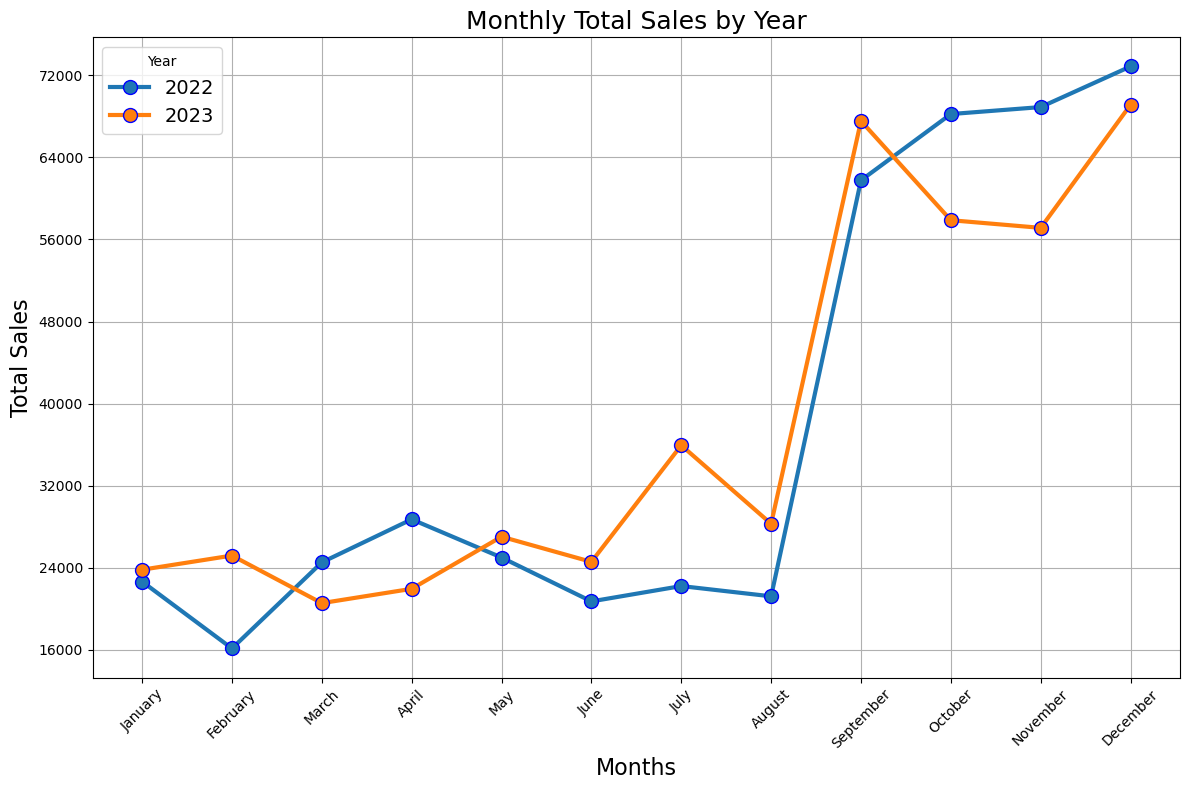

In [70]:
# Plot the pivot table

# Bigger figure
plt.figure(figsize=(12, 8))

# Plot pivot table
pivot.plot(
    marker="o",
    markersize=10,
    markeredgecolor="blue",
    linestyle="-",
    linewidth=3,
    ax=plt.gca()  # Use current axes to control xticks
)

# Force all month names on X-axis
plt.xticks(ticks=range(len(pivot.index)), labels=pivot.index, rotation=45)

# Set Y-axis to have more ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))  # ~10 ticks

plt.title('Monthly Total Sales by Year', fontsize=18)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.legend(title='Year', fontsize=14)
plt.grid(True)
plt.tight_layout()  # adjusts spacing to prevent clipping
plt.show()


# ✅ Notes:
# plt.xticks(ticks=range(len(pivot.index)), labels=pivot.index) → forces all months to appear.
# rotation=45 → tilts labels so they don’t overlap.
# plt.tight_layout() → ensures title/labels don’t get cut off, especially for bigger figures.